# Latency Lag

In [25]:
import quail
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import rpy2
import numpy as np

%matplotlib inline
sns.set_context("notebook", font_scale=1.5)

## Import Data

In [26]:
with open('../data/automatic_transcription.p', 'rb') as file:
    auto_words = pickle.load(file)
    
with open('../data/manual_transcription.p', 'rb') as file:
    man_words = pickle.load(file)

In [27]:
with open('../data/automatic_onsets.p', 'rb') as file:
    auto_onsets = pickle.load(file)
    
with open('../data/manual_onsets.p', 'rb') as file:
    man_onsets = pickle.load(file)

## Obtain Latency Data (Man)

In [28]:
# WHEN ADDING TO QUAIL: will want to make this a function with the number of subjects, lists, etc NOT hard coded
# currently hard coded based on known dimensions of the data

for subject in range(30):
    
    for listy in range(8):
        
        #initialize numpy array with nans
        man_lat = np.full((17,31), np.nan)
        
        #for each recall
        for recall in range(1,17):
            
            # OBTAIN PRES AND REC DATA
            pres_list = list(man_words.pres.loc[subject].iloc[listy])
            man_list = list(man_words.rec.loc[subject].iloc[listy])
            man_onset_list = list(man_onsets.loc[subject].iloc[listy])
            
            # FIND WORD PAIR
            man_word = man_list[recall]
            prev_man_word = man_list[recall-1]
            
            # if both are strings and not repetitions
            if type(man_word) == str and type(prev_man_word) == str and man_word != prev_man_word:  
            
                # if both were presented
                if man_word in pres_list and prev_man_word in pres_list:
                    
                    # obtain latencies
                    man_onset = float(man_onset_list[recall])*.001
                    prev_man_onset = float(man_onset_list[recall-1])*.001
                    
                    # subtract onset times and add to array
                    lat = man_onset - prev_man_onset
                    
                    # plus fifteen due to indexing
                    man_lat[recall, (pres_list.index(man_word)-pres_list.index(prev_man_word))+15] = lat
        
        # concat into subj level dataframe
        if listy == 0:
            latencies = pd.DataFrame(man_lat)
        elif listy == 1:
            latencies = pd.concat([latencies, pd.DataFrame(man_lat)], keys=[0,listy])
        else:
            latencies = pd.concat([latencies, pd.concat([pd.DataFrame(man_lat)], keys=[listy])])
    
    # concat into dataframe of all subs
    if subject == 0:
        full = latencies
    elif subject == 1:
        full = pd.concat([full, pd.DataFrame(latencies)], keys=[0,subject])
    else:
        full = pd.concat([full, pd.concat([pd.DataFrame(latencies)], keys=[subject])])
    

## Arrange data & Plot latency

In [29]:
for subject in range(30):
    
    # obtain columnwise means, within subjects
    mean = pd.DataFrame.transpose(pd.DataFrame(pd.DataFrame.mean(full.loc[subject])))
    
    # concat dataframe
    if subject == 0:
        full_mean = mean
        
    elif subject == 1:
        full_mean = pd.concat([full_mean, mean])#, keys=[0,subject])
        
    else:
        full_mean = pd.concat([full_mean, pd.concat([mean])])#, keys=[subject])])

In [30]:
# reset indexing
full_mean = full_mean.reset_index('index')
del full_mean['index']

In [31]:
# reshape
full_mean1 = full_mean.as_matrix().reshape(30,31)

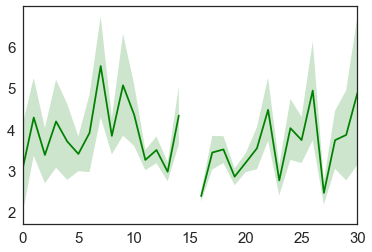

In [32]:
sns.tsplot(full_mean1, estimator=np.nanmean, color='green')
plt.show()

## Obtain Latency Data (Auto)

In [33]:
for subject in range(30):
    
    for listy in range(8):
        
        auto_lat = np.full((20,31), np.nan)
        #auto_lat = np.zeros((16,31))
        
        #for each recall
        for recall in range(1,20):
            
            # PRES DATA
            pres_list = list(auto_words.pres.loc[subject].iloc[listy])
            auto_list = list(auto_words.rec.loc[subject].iloc[listy])
            auto_onset_list = list(auto_onsets.loc[subject].iloc[listy])
            
            # AUTO LATS
            auto_word = auto_list[recall]
            prev_auto_word = auto_list[recall-1]
            
            # if both are strings
            if type(auto_word) == str and type(prev_auto_word) == str and auto_word != prev_auto_word:
                
                # if both were presented
                if auto_word in pres_list and prev_auto_word in pres_list:
                    
                    # obtain latencies
                    auto_onset = float(auto_onset_list[recall])
                    prev_auto_onset = float(auto_onset_list[recall-1])
                    
                    # subtract and add to array
                    lat = auto_onset - prev_auto_onset
                    auto_lat[recall, (pres_list.index(auto_word)-pres_list.index(prev_auto_word))+15] = lat
                    
        if listy == 0:
            latencies = pd.DataFrame(auto_lat)
        elif listy == 1:
            latencies = pd.concat([latencies, pd.DataFrame(auto_lat)], keys=[0,listy])
        else:
            latencies = pd.concat([latencies, pd.concat([pd.DataFrame(auto_lat)], keys=[listy])])
    
    if subject == 0:
        full2 = latencies
    elif subject == 1:
        full2 = pd.concat([full2, pd.DataFrame(latencies)], keys=[0,subject])
    else:
        full2 = pd.concat([full2, pd.concat([pd.DataFrame(latencies)], keys=[subject])])
    

In [34]:
for subject in range(30):
    
    # obtain columnwise means, within subjects
    mean2 = pd.DataFrame.transpose(pd.DataFrame(pd.DataFrame.mean(full2.loc[subject])))
    
    # concat dataframe
    if subject == 0:
        full_mean2 = mean2
        
    elif subject == 1:
        full_mean2 = pd.concat([full_mean2, mean2])#, keys=[0,subject])
        
    else:
        full_mean2 = pd.concat([full_mean2, pd.concat([mean2])])#, keys=[subject])])

In [35]:
# reset indxing
full_mean2 = full_mean2.reset_index('index')
del full_mean2['index']

In [36]:
# reshape
full_mean2 = full_mean2.as_matrix().reshape(30,31)

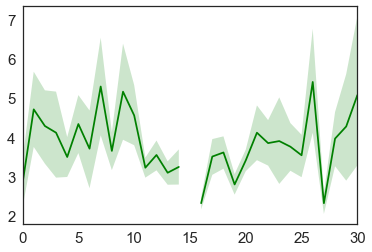

In [37]:
sns.tsplot(full_mean2, estimator=np.nanmean, color='green')
plt.show()

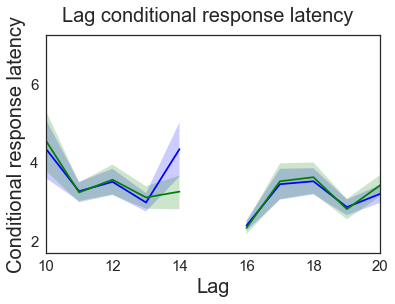

In [38]:


fig,ax = plt.subplots()
sns.set_style('white')


sns.tsplot(full_mean1, estimator=np.nanmean, color='blue')
#ax.twinx()
sns.tsplot(full_mean2, estimator=np.nanmean, color='green')

plt.rcParams["axes.labelsize"] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

#label axes
ax.set_xlabel('Lag', size = 20)
ax.set_ylabel('Conditional response latency', size = 20)

fig.suptitle('Lag conditional response latency', fontsize=20)

plt.xlim(10, 20)
plt.show()

fig.savefig("lagCRL.pdf")